In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings('ignore')

### Data exploration

In [2]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


### Descriptive stats

In [4]:
df.shape

(2900, 8)

In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
#Missing Values
df.isna().sum()/len(df) * 100

Time_spent_Alone             2.172414
Stage_fear                   2.517241
Social_event_attendance      2.137931
Going_outside                2.275862
Drained_after_socializing    1.793103
Friends_circle_size          2.655172
Post_frequency               2.241379
Personality                  0.000000
dtype: float64

<Axes: >

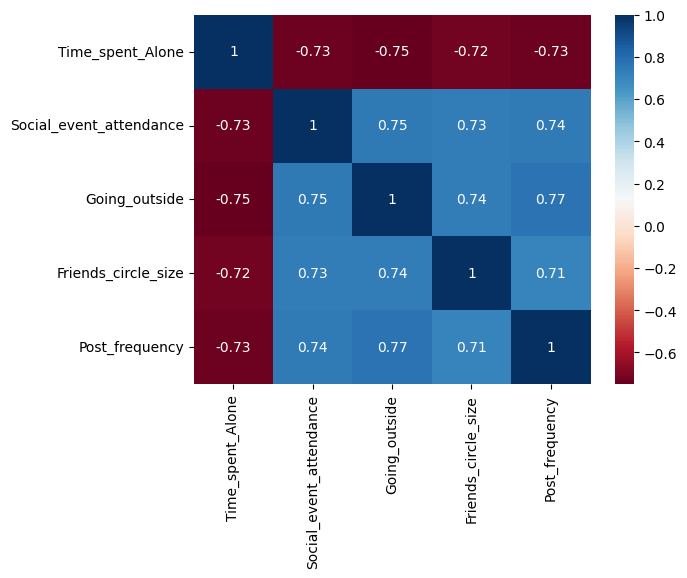

In [7]:
#Correlation
corr = df.corr(numeric_only='True')

sns.heatmap(corr, annot=True, cmap='RdBu')

<Axes: xlabel='Post_frequency', ylabel='Density'>

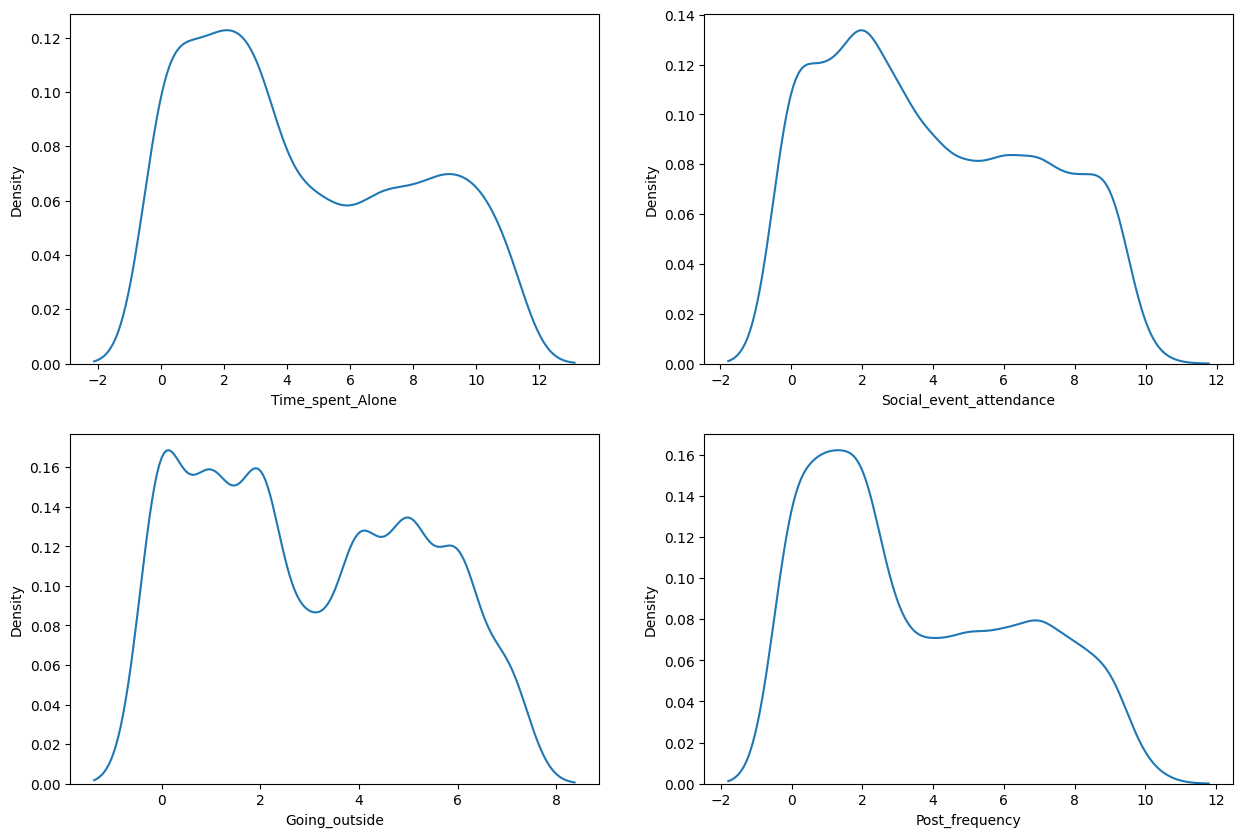

In [8]:
#Check data distribution

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.kdeplot(df['Time_spent_Alone'], ax=ax[0,0])

sns.kdeplot(df['Social_event_attendance'], ax=ax[0,1])

sns.kdeplot(df['Going_outside'], ax=ax[1,0])

sns.kdeplot(df['Post_frequency'], ax=ax[1,1])

In [9]:
#Filling in missing values
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## Data Visualization

In [11]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


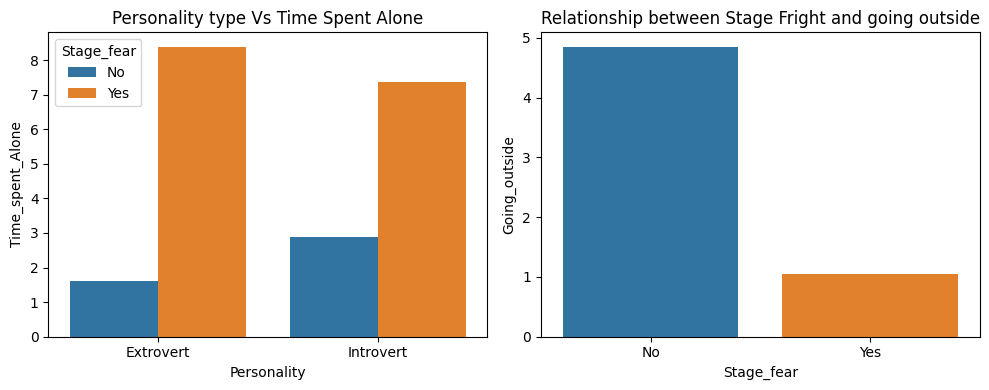

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(data=df, x='Personality', y='Time_spent_Alone', hue='Stage_fear', errorbar=None, ax=ax[0])
ax[0].set_title('Personality type Vs Time Spent Alone')
sns.barplot(data=df, x='Stage_fear', y='Going_outside', hue='Stage_fear', errorbar=None, ax=ax[1])
ax[1].set_title('Relationship between Stage Fright and going outside')
plt.tight_layout()
plt.show()

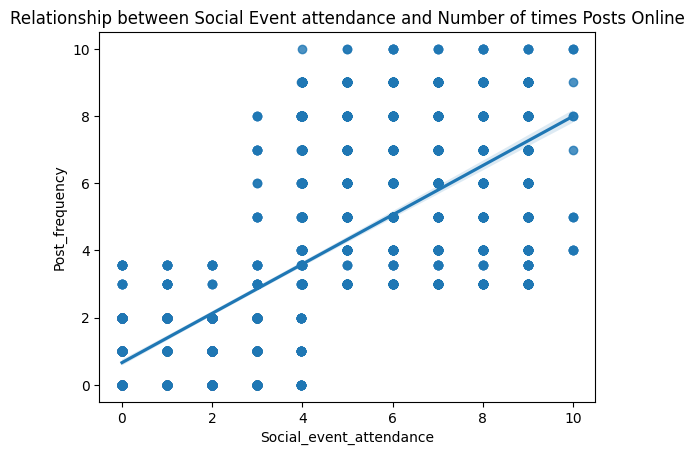

In [13]:
sns.regplot(data=df, x="Social_event_attendance", y="Post_frequency")
plt.title('Relationship between Social Event attendance and Number of times Posts Online')
plt.xlabel('Social_event_attendance')
plt.ylabel('Post_frequency')
plt.show()

## Machine Learning

#### Label Encoding

In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col]=le.fit_transform(df[col])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


#### Splitting the data

In [15]:
X = df.drop(['Personality'], axis=1)
y= df['Personality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2030, 7)
(870, 7)
(2030,)
(870,)


#### Modelling

In [17]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [18]:
preds = clf.predict(X_test)

In [19]:
confusion_matrix(y_test, preds)

array([[427,  36],
       [ 29, 378]])

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.92      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870



In [21]:
rclf = RandomForestClassifier(max_depth=10, random_state=42)
rclf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [22]:
random_pred = rclf.predict(X_test)

In [23]:
print(confusion_matrix(y_test, random_pred))

[[427  36]
 [ 28 379]]


In [24]:
print(classification_report(y_test, random_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870



In [25]:
print(clf.score(X_test, y_test))
print(rclf.score(X_test, y_test))


0.9252873563218391
0.9264367816091954


In [26]:
importances = rclf.feature_importances_

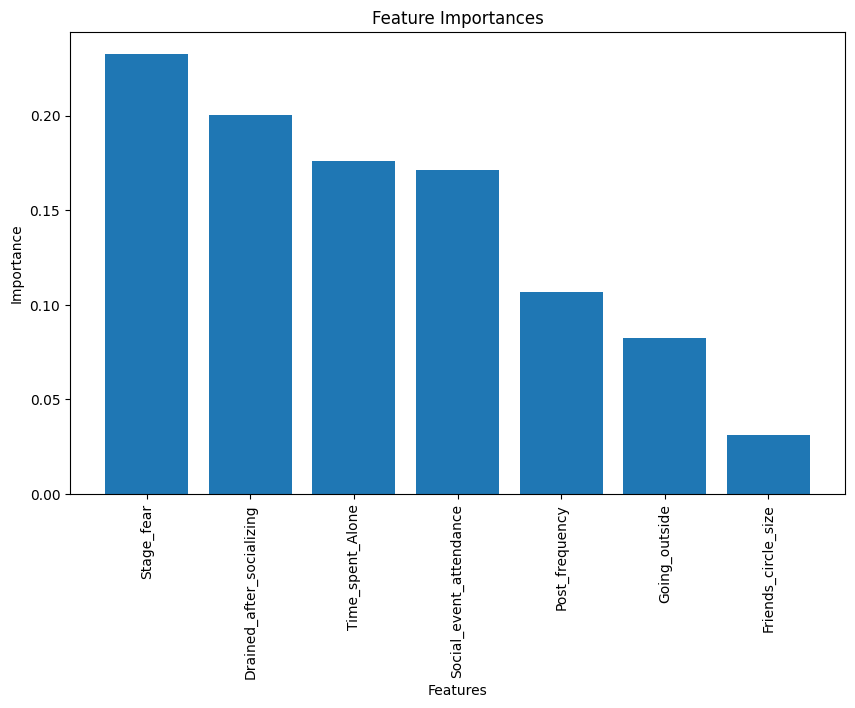

In [28]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()